<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Machine-Learning-Projects/blob/master/car_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0: Import libraries

In [1]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image

# graphs
% matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import random
import cv2
import os
import glob

Using TensorFlow backend.


## Step1: Upload data from google drive to colab

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"

## Step 1: Get familar with the data & visualize the images

#### 1.1 visualize one image with the corresponding labelled image

TypeError: ignored

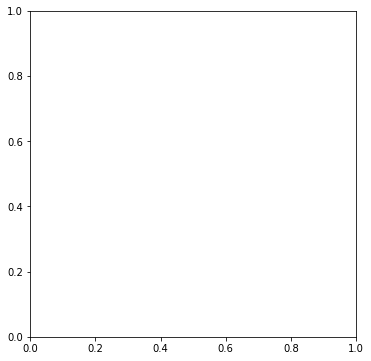

In [4]:
#fig = plt.figure(figsize = (8, 6))
img_RGB = "/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/000020.png"
img_Seg = "/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/000020.png"
img_RGB_arary = cv2.imread(img_RGB)
img_Seg_arary = cv2.imread(img_Seg)
plt.rcParams['figure.figsize'] = (8, 6)
plt.imshow(img_RGB_arary)
plt.show()
plt.imshow(img_Seg_arary[:, :, 0])
plt.show() 
 

In [0]:
img_Seg_arary.shape

## Step 2: Data Preprocessing

#### 2.1 Combine episode_0001 to episode_0014 for training & testing dataset respectively

In [0]:
# create two files, x_train, y_train to store the original images and labels
#os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/x_train_images")
#os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/y_train_labels")

In [0]:
# move all RGB images to x_train_images
episodes = ["0001/", "0002/", "0003/", "0004/", "0005/", "0006/", "0007/", "0008/", "0009/", "0010/", "0011/", "0012/", "0013/", "0014/"]
for episode in episodes:
  pathes = glob.glob("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_" + episode + "CameraRGB/*.png")
  for path in pathes:
    head, tail = os.path.split(path)
    new_path = "/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/x_train_images/" + head[-22:-10] + "RGB_" + tail
    os.rename(path, new_path)
    #print(new_path)

In [0]:
# move all Seg (labels) to y_train_images
episodes = ["0001/", "0002/", "0003/", "0004/", "0005/", "0006/", "0007/", "0008/", "0009/", "0010/", "0011/", "0012/", "0013/", "0014/"]
for episode in episodes:
  pathes = glob.glob("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_" + episode + "CameraSeg/*.png")
  for path in pathes:
    head, tail = os.path.split(path)
    new_path = "/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/y_train_labels/" + head[-22:-10] + "Seg_" + tail
    os.rename(path, new_path)
    #print(new_path)

In [8]:
dir_train_images = '/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/x_train_images'
dir_train_labels = '/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/y_train_labels'

dir_train_images_fname = os.listdir(dir_train_images)
dir_train_labels_fname = os.listdir(dir_train_labels)

print("Total training images:", len(dir_train_images_fname))
print("Total training labels:", len(dir_train_labels_fname))

Total training images: 2523
Total training labels: 2520


#### 2.2 Samll dataset (x_train, y_train ) episod_0000 for pilot practice

In [10]:
os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/training_imgs")
os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/training_labels")

os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part")       
         
os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_imgs")
os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_imgs/data")
os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_labels")
os.mkdir("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_labels/data")

FileExistsError: ignored

In [0]:
# Move images and labels to the sub_files
"""
pathes = glob.glob("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/*.png")
for path in pathes[:150]:
  head, tail = os.path.split(path)
  #print(head)
  #print(tail)
  new_path = head + '/training_imgs/' + tail
  os.rename(path, new_path)
"""
# Move the rest 30 images for validation
for path in pathes[150:]:
  head, tail = os.path.split(path)
  #print(head)
  #print(tail)
  #print(head)
  #print(tail)
  new_path = "/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_imgs/data/" + tail
  os.rename(path, new_path)
  


In [0]:
# Move images and labels to the sub_files
pathes = glob.glob("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/*.png")
for path in pathes:
  head, tail = os.path.split(path)
  #print(head)
  #print(tail)
  new_path = head + '/training_labels/' + tail
  os.rename(path, new_path)

#### Data Augumentation

In [13]:
# Creating the training Image and Mask generator

batch_size = 16

train_datagen = ImageDataGenerator(rescale = 1/255.) # shear_range = 0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect'

#mask_datagen = image.ImageDataGenerator()

train_image_generator = train_datagen.flow_from_directory("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB", 
                       batch_size = batch_size) # target_size = (img_size, img_size), shuffle = True

train_mask_generator = train_datagen.flow_from_directory("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg", 
                       batch_size = batch_size) # target_size = (img_size, img_size), shuffle = True

# Creating the validation Image and Mask generator
val_datagen = ImageDataGenerator(rescale = 1/255.)

val_image_generator = val_datagen.flow_from_directory("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_imgs",
                      batch_size = batch_size)
val_mask_generator = val_datagen.flow_from_directory("/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_labels",
                      batch_size = batch_size)


train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 180 images belonging to 1 classes.
Found 180 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


#### Creating data generator

In [0]:
def data_gen(img_folder, mask_folder, batch_size):
  c = 0
  n = os.listdir(img_folder) # List of training images
  random.shuffle(n)
  
  while (True):
    img = np.zeros((batch_size, 256, 800, 3)).astype('float')
    mask = np.zeros((batch_size, 256, 800, 1)).astype('float')
    
    for i in range(c, c + batch_size): # initially from 0 to 16, c = 0
      train_img = cv2.imread(img_folder + '/' + n[i])/255.
      #train_img = cv2.resize(train_img, (512, 512)) # Read an image from folder and resize the image
      
      img[i-c] = train_img # add to array -img[0], img[1], and so on
      
      train_mask = cv2.imread(mask_folder + '/' + n[i], cv2.IMREAD_GRAYSCALE)/255.
      #train_mask = cv2.resize(train_mask, (512, 512))
      train_mask = train_mask.reshape(256, 800, 1) # Add extra dimension for the parity with train_img
      
      mask[i-c] = train_mask
      
    c += batch_size
    if (c + batch_size >= len(os.listdir(img_folder))):
      c = 0
      random.shuffle(n)
    yield img, mask
    
train_frame_path = '/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/training_imgs'
train_mask_path = '/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/training_labels'

val_frame_path = '/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_imgs/data'
val_mask_path = '/content/drive/My Drive/Deep Learning projects/car segmentation/validation data part/validation_labels/data'

# train the model
train_gen = data_gen(train_frame_path, train_mask_path, batch_size = 4)
val_gen = data_gen(val_frame_path, val_mask_path, batch_size = 4)

In [15]:
n = os.listdir('/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/training_imgs') # List of training images
print(n)

['000020.png', '000021.png', '000022.png', '000025.png', '000023.png', '000027.png', '000024.png', '000026.png', '000028.png', '000030.png', '000029.png', '000031.png', '000032.png', '000035.png', '000034.png', '000036.png', '000033.png', '000037.png', '000040.png', '000038.png', '000041.png', '000039.png', '000042.png', '000043.png', '000044.png', '000045.png', '000046.png', '000050.png', '000047.png', '000051.png', '000048.png', '000052.png', '000049.png', '000054.png', '000053.png', '000056.png', '000057.png', '000060.png', '000055.png', '000062.png', '000058.png', '000061.png', '000059.png', '000063.png', '000064.png', '000065.png', '000066.png', '000070.png', '000067.png', '000071.png', '000068.png', '000072.png', '000069.png', '000074.png', '000073.png', '000075.png', '000080.png', '000076.png', '000081.png', '000077.png', '000082.png', '000078.png', '000079.png', '000083.png', '000084.png', '000085.png', '000086.png', '000090.png', '000088.png', '000091.png', '000087.png', '0000

#### Optional transform images to array first, then for model training, this is impractical for big data

In [16]:

x_train = []
i = 0
for img in os.listdir("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/training_imgs"):
  img_path = os.path.join("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraRGB/training_imgs", img)
  img_array = cv2.imread(img_path)
  #print(img_array)
  x_train.append(img_array/255)
    
#new_array = cv2.resize(img_array, (img_size, img_size))
  

x_train = np.asarray(x_train)
x_train.shape


KeyboardInterrupt: ignored

In [0]:
y_train = []
i = 0
for img in os.listdir("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/training_labels"):
  img_path = os.path.join("/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/labels", img)
  img_array = cv2.imread(img_path)
  y_train.append(img_array[:, :, 0:1])
y_train = np.asarray(y_train)
y_train.shape

In [0]:
# remove the images not correct
# !rm "/content/drive/My Drive/Deep Learning projects/car segmentation/training data part/episode_0000/CameraSeg/._000020.png"

## Step 3: Prepare for the U-Net Model

A successful and popular model for object detection if the UNet architecture. It consists of a contracting path and an expansive path.

The contracting path follows the typical architecture of a convolutional network. It consists of the repeated application of two 3 * 3 convolutions, each followed by a batchnormalization layer and a ReLU activation and dropout and a 2 * 2 max pooling operation with stride 2 for downsampling. At each downsampling step we double the number of feature channnels. THe purpose of this contracting path is to capture the context of the input image in order to be able to do segmentation.

Every step in the expansive path consists of an upsampling of the feature map followed by a 2 * 2 convolution ("up-convolution") that halves the number of feature channels, a concatenation with the correspondingly feature map from the contracting path, and two 3 * 3 convolutions, each followed by batchnorm, dropout and a ReLU. The purpose of this expanding path is to enable precise localization combined with contextual information from the contracting path.

At the final layer a 1 * 1 convolution is used to map each 16 - component feature vector to the desired number of classes.

#### 3.1 Model creation

In [0]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [0]:
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [19]:
im_height = 256
im_width = 800

input_img = Input((im_height, im_width, 3), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)

model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

W0805 22:13:11.217647 139875181086592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 22:13:11.285825 139875181086592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 22:13:11.288162 139875181086592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0805 22:13:11.339312 139875181086592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 22:13:11.340676

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 256, 800, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 800, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 800, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 800, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

#### 3.2 Model visualization

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

#### 3.3 Model fitting/training

In [0]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=30, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-tgs-salt.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [22]:
steps_per_epoch = 150/16
validation_steps = 30/16

history = model.fit_generator(train_gen, 
                              epochs = 100,
                              steps_per_epoch = steps_per_epoch, # number of training_images / batch_size
                              validation_data = val_gen,
                              validation_steps = validation_steps)

model.save('car_detection_Model.h5')

Epoch 1/100
9/9 [===========================>..] - ETA: 1s - loss: 0.9759 - acc: 0.0608

IndexError: ignored

## Step 4: Model accuracy & loss analysis

In [0]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [0]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
#plt.plot( np.argmin(history.history["val_acc"]), np.min(history.history["val_acc"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_acc")
plt.legend();

## Step 5: Inference With the Model

In [0]:
# Load best model
model.load_weights('model-tgs-salt.h5')

In [0]:
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(X_valid, y_valid, verbose=1)

In [0]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [0]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

## Useful reference
URL_1 = "https://towardsdatascience.com/faster-r-cnn-object-detection-implemented-by-keras-for-custom-data-from-googles-open-images-125f62b9141a"

URL_2 = "https://tryolabs.com/blog/2018/01/18/faster-r-cnn-down-the-rabbit-hole-of-modern-object-detection/"

URL_3 = "https://tryolabs.com/blog/2017/08/30/object-detection-an-overview-in-the-age-of-deep-learning/" **(include datasets)**

URL_4 = "https://tryolabs.com/blog/2018/01/18/faster-r-cnn-down-the-rabbit-hole-of-modern-object-detection/"

URL_5 = "https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9" **(Deep learning for object Detection)**

URL_6 = "https://towardsdatascience.com/deep-learning-for-object-detection-a-comprehensive-review-73930816d8d9"

URL_7 = "https://www.depends-on-the-definition.com/unet-keras-segmenting-images/" **(unet model)**